In [2]:
import os
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from newsapi import NewsApiClient
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/huimin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='4982a08abb054e0684b83bb663f130d3')

In [6]:
# Fetch the Bitcoin news articles

BTC_headlines= newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [7]:
# Fetch the Ethereum news articles
ETH_headlines=newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [8]:
# Create the Bitcoin sentiment scores DataFrame

sentiments = []

for articles in BTC_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
        })
    except AttributeError:
        pass
BTC  = pd.DataFrame(sentiments)
BTC.head()

,text,Compound,Positive,Negative,Neutral
0,"Whether Bitcoin, an immaterial resource derive...",0.2999,0.104,0.796,0.100
1,"As well as the May bitcoin halving, which will...",0.8555,0.239,0.724,0.037
2,Our robot colleague Satoshi Nakaboto writes ab...,0.8166,0.143,0.857,0.000
3,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.067,0.933,0.000
4,Our robot colleague Satoshi Nakaboto writes ab...,0.1725,0.066,0.882,0.052


In [9]:
# Create the ethereum sentiment scores DataFrame

sentiments = []

for articles in ETH_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
        })
    except AttributeError:
        pass
    
ETH  = pd.DataFrame(sentiments)
ETH.head()

,text,Compound,Positive,Negative,Neutral
0,Sharding and scalability. Transactions per sec...,0.3595,0.055,0.945,0.000
1,"On Friday, the United States Attorney's Office...",-0.7003,0.058,0.764,0.178
2,A hacker-turned-cryptocurrency guru who compet...,0.4019,0.114,0.835,0.051
3,"On December 11 and December 12, some of the br...",0.7269,0.115,0.885,0.000
4,Enlarge/ Virgil Griffith.\r\n13 with 13 poster...,-0.2023,0.052,0.878,0.070


In [10]:
# Describe the Bitcoin Sentiment
BTC.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.458905,0.087368,0.892053,0.020632
std,0.253065,0.048501,0.063583,0.034178
min,-0.102700,0.000000,0.724000,0.000000
25%,0.297950,0.067000,0.857000,0.000000
50%,0.507000,0.072000,0.926000,0.000000
75%,0.553000,0.098500,0.932000,0.040000
max,0.855500,0.239000,1.000000,0.100000


In [11]:
# Describe the Ethereum Sentiment
ETH.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,-0.138953,0.061053,0.849684,0.089263
std,0.504212,0.032768,0.072160,0.077031
min,-0.875000,0.000000,0.661000,0.000000
25%,-0.597150,0.047500,0.813500,0.025500
50%,-0.153100,0.055000,0.841000,0.070000
75%,0.296000,0.072500,0.892500,0.141000
max,0.726900,0.116000,0.954000,0.291000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huimin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [15]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/huimin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Create a new tokens column for bitcoin
BTC["tokens"] = BTC.text.apply(tokenizer)
BTC.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Whether Bitcoin, an immaterial resource derive...",0.2999,0.104,0.796,0.100,"[Whether, Bitcoin, immaterial, resource, deriv..."
1,"As well as the May bitcoin halving, which will...",0.8555,0.239,0.724,0.037,"[well, May, bitcoin, halving, see, number, bit..."
2,Our robot colleague Satoshi Nakaboto writes ab...,0.8166,0.143,0.857,0.000,"[robot, colleague, Satoshi, Nakaboto, writes, ..."
3,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.067,0.933,0.000,"[robot, colleague, Satoshi, Nakaboto, writes, ..."
4,Our robot colleague Satoshi Nakaboto writes ab...,0.1725,0.066,0.882,0.052,"[robot, colleague, Satoshi, Nakaboto, writes, ..."


In [18]:
# Create a new tokens column for ethereum
ETH["tokens"] = ETH.text.apply(tokenizer)
ETH.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Sharding and scalability. Transactions per sec...,0.3595,0.055,0.945,0.000,"[Sharding, scalability, Transactions, per, sec..."
1,"On Friday, the United States Attorney's Office...",-0.7003,0.058,0.764,0.178,"[Friday, United, States, Attorney, Office, Sou..."
2,A hacker-turned-cryptocurrency guru who compet...,0.4019,0.114,0.835,0.051,"[hacker-turned-cryptocurrency, guru, competed,..."
3,"On December 11 and December 12, some of the br...",0.7269,0.115,0.885,0.000,"[December, 11, December, 12, brightest, mind, ..."
4,Enlarge/ Virgil Griffith.\r\n13 with 13 poster...,-0.2023,0.052,0.878,0.070,"[Enlarge/, Virgil, Griffith, 13, 13, poster, p..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2

N = 2
BTC_grams = ngrams(tokenizer(BTC.text.str.cat()), N)
Counter(BTC_grams).most_common(10)

[(('Satoshi', 'Nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'Satoshi'), 13),
 (('Nakaboto', 'writes'), 13),
 (('writes', 'Bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'Welcome'), 13),
 (('Welcome', 'another'), 13)]

In [21]:
# Generate the Ethereum N-grams where N=2
N = 2
ETH_grams = ngrams(tokenizer(ETH.text.str.cat()), N)
Counter(ETH_grams).most_common(10)

[(('North', 'Korea'), 10),
 (('Virgil', 'Griffith'), 9),
 (('Griffith', 'arrested'), 4),
 (('United', 'States'), 3),
 (('Korea', 'evade'), 3),
 (('cryptocurrency', 'exchange'), 3),
 (('Ethereum', 'ETH'), 3),
 (('States', 'Attorney'), 2),
 (('Attorney', 'Office'), 2),
 (('Ethereum', 'Foundation'), 2)]

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin
top_10_words = tokenizer(BTC.text.str.cat())
token_count(top_10_words, 10)

[('Bitcoin', 43),
 ('Satoshi', 26),
 ('Nakaboto', 26),
 ('char', 19),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('day', 13)]

In [24]:
# Get the top 10 words for Ethereum
top_10_words = tokenizer(ETH.text.str.cat())
token_count(top_10_words, 10)

[('char', 18),
 ('cryptocurrency', 13),
 ('Griffith', 12),
 ('North', 10),
 ('Korea', 10),
 ('Virgil', 9),
 ('Ethereum', 7),
 ('arrested', 5),
 ('accused', 5),
 ('sanction', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

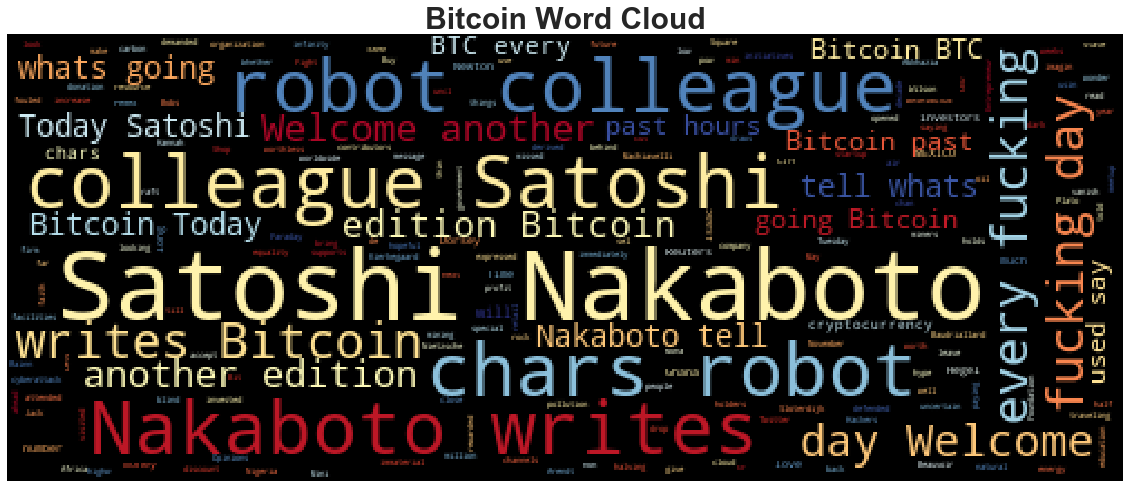

In [26]:
# Generate the Bitcoin word cloud

def wordcloud(text, title="Bitcoin Word Cloud"):
    BTC_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(BTC_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 30, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(BTC.text.str.cat(), title="Bitcoin Word Cloud")

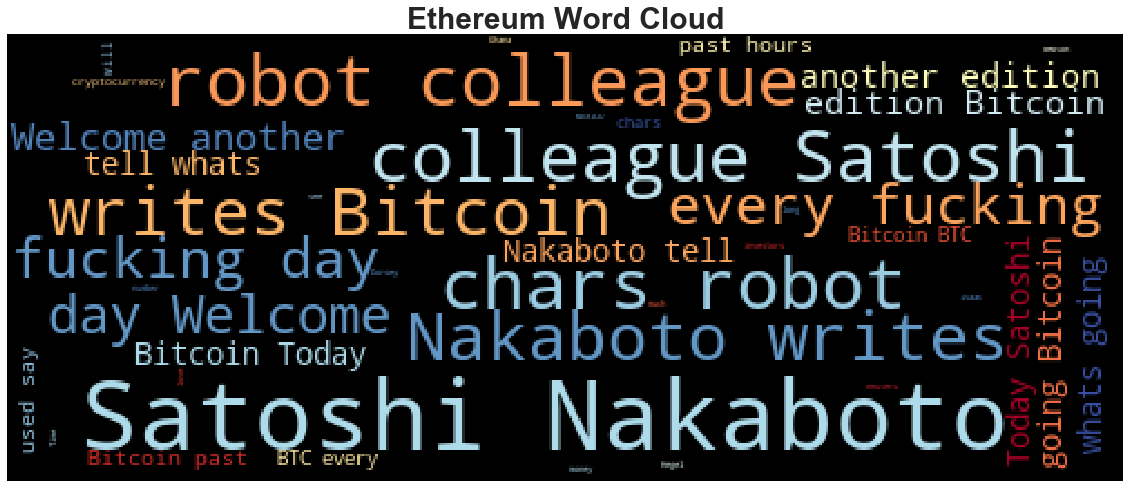

In [27]:
# Generate the Ethereum word cloud

def wordcloud(text, title="Ethereum Word Cloud"):
    BTC_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(BTC_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 30, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(BTC.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text together
concat_all_BTC = BTC.text.str.cat()
concat_all_BTC

'Whether Bitcoin, an immaterial resource derived from hype and blind faith, will vanish into thin air is uncertain, but it will leave behind a dark cloud of carbon pollution. Cryptocurrency mining facilities use so much energy that the government of Abkhazia c… [+3402 chars]As well as the May bitcoin halving, which will see the number of bitcoin rewarded to miners cut by half from 12.5 bitcoin to 6.25 bitcoin, bitcoin investors are hopeful next year will bring an increase in the number of bitcoin retail investors and people usin… [+882 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As de Beauvoir used to say: If you love yours… [+2602 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been 

In [32]:
# Run the NER processor on all of the text

ner_processor = nlp(concat_all_BTC)

# Add a title to the document
ner_processor.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(ner_processor, style='ent', jupyter=True)

In [34]:
# List all Entities

for ent in ner_processor.ents:
    print(ent.text, ent.label_)

Bitcoin PERSON
Abkhazia GPE
May DATE
half CARDINAL
12.5 CARDINAL
6.25 CARDINAL
next year DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
de Beauvoir PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Sloterdijk PERSON
+2682 chars]Our ORG
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin BTC FAC
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Isaac Newton PERS

---

## Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
concat_ETH = ETH.text.str.cat()
concat_ETH

"Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain many, many issues to tea… [+3851 chars]On Friday, the United States Attorney's Office for the Southern District of New York announced that Ethereum Foundation staff member Virgil Griffith was arrested. He faces charges of conspiracy following a trip to North Korea and a presentation at the Pyongya… [+1811 chars]A hacker-turned-cryptocurrency guru who competed on TBSs King of the Nerds has been accused by federal prosecutors of assisting North Korea evade United States sanctions.\r\nVirgil Griffith said over a decade ago he wanted to create minor public-relations disas… [+2573 chars]On December 11 and December 12, some of the brightest mind in fintech are coming to TechCrunch Disrupt in Berlin. While well sit down with some of the most famo

In [36]:
# Run the NER processor on all of the text

ner_processor_ETH = nlp(concat_ETH)

# Add a title to the document

ner_processor_ETH.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(ner_processor_ETH, style='ent', jupyter=True)

In [38]:
# List all Entities
for ent in ner_processor_ETH.ents:
    print(ent.text, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Friday DATE
the United States GPE
Office for the Southern District ORG
New York GPE
Ethereum Foundation ORG
Virgil Griffith PERSON
North Korea GPE
TBSs King of the Nerds PERSON
North Korea GPE
United States GPE
Virgil Griffith PERSON
a decade ago DATE
December 11 and December 12 DATE
TechCrunch Disrupt ORG
Berlin GPE
Virgil Griffith PERSON
13 CARDINAL
13 CARDINAL
Virgil Griffith PERSON
US GPE
Friday DATE
April DATE
North Korea GPE
US GPE
Korean NORP
Upbit ORG
Ethereum ETH PRODUCT
342,000 CARDINAL
$48.7 million MONEY
CNN ORG
US GPE
Los Angeles GPE
Monday DATE
North Korea GPE
the United States GPE
Office ORG
Virgil Griffith PERSON
36 DATE
North Korea GPE
William F. Sweeney Jr. PERSON
Vitalik Buterin PERSON
Virgil Griffith PERSON
North Korea GPE
Griffith PERSON
Ethereum PRODUCT
North Korea GPE
US GPE
Virgil Griffith PERSON
the Ethereum Foundation ORG
Berlin GPE
December 11 and December 12 DATE
UI ORG
+17169 ORG
Virgil Griffith PERSON
last week DA